### Aarjeyan Shrestha - January 27, 2025 - Lab4
#### `create data for a binary classification problem  (for example sentiment analysis)`

1- You can use data from internet or use SKlearn to create random data (2000 rows and 5 numerical columns)

2- Use optbinning.optimalbinning and logistic regression OR XG boost OR gradient boost OR random forest to create a binary classifier (you can then also try this without optimal binning separately and compare results)

3- Calculate ROC for train and test set.

4- Create WOE tables, and plots to show the binning and WOE

5. remember to do hyper parameter tuning with random search

PROVIDE PROPER MARKDOWN IN YOUR JUPYTER NOTEBOOK

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

(CVXPY) Jan 27 09:25:21 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 27 09:25:21 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
#Load the dataset
data = pd.read_csv('data.csv',delimiter=';', encoding='utf-8')

In [3]:
print("Dataset Preview:")
display(data.head())

Dataset Preview:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print("\nDataset Summary:")
display(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification 

None

In [5]:
print("\nDataset Statistics:")
display(data.describe())


Dataset Statistics:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
target = 'Target'

In [7]:
features = data.columns.drop(target)

In [8]:
print("Unique Target Values:", data['Target'].unique())  


Unique Target Values: ['Dropout' 'Graduate' 'Enrolled']


In [9]:
# Convert target to binary: Dropout vs. others
data['Target_Binary'] = (data['Target'] == 'Graduate').astype(int)

# Splitting into train and test
X = data.drop(['Target', 'Target_Binary'], axis=1)
y = data['Target_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Optimal Binning
optimal_bins = {}
woe_train = pd.DataFrame(index=X_train.index)
woe_test = pd.DataFrame(index=X_test.index)

In [11]:
for feature in features:
    # Perform optimal binning
    binning = OptimalBinning(name=feature, dtype="numerical", solver="cp")
    binning.fit(X_train[feature], y_train)
    optimal_bins[feature] = binning

    # Transform features to WOE
    woe_train[feature] = binning.transform(X_train[feature], metric="woe")
    woe_test[feature] = binning.transform(X_test[feature], metric="woe")

C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

In [12]:
# 3. Train Logistic Regression using WOE-transformed data
lr = LogisticRegression()
param = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
random_search = RandomizedSearchCV(lr, param_distributions=param, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(woe_train, y_train)
# Best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.03359818286283781)}


In [13]:
clf = LogisticRegression(**best_params)
clf.fit(X_train, y_train)

LogisticRegression(C=np.float64(0.03359818286283781), solver='liblinear')

In [14]:
# Make predictions
y_train_pred = clf.predict_proba(woe_train)[:, 1]
y_test_pred = clf.predict_proba(woe_test)[:, 1]

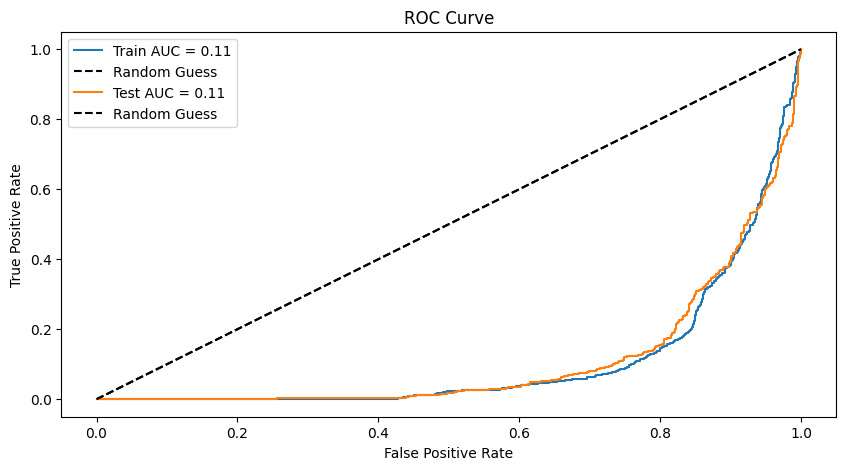

In [15]:
# 4. Calculate and Plot ROC Curve
def plot_roc(y_true, y_pred, dataset_type="Train"):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    plt.plot(fpr, tpr, label=f"{dataset_type} AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure(figsize=(10, 5))
plot_roc(y_train, y_train_pred, dataset_type="Train")
plot_roc(y_test, y_test_pred, dataset_type="Test")
plt.show()

In [16]:
# Function to create WOE tables
def woe_table(binning, feature):
    binning_table = binning.binning_table.build()
    table = pd.DataFrame(binning_table)  # Convert the dictionary to a DataFrame
    table["Feature"] = feature  # Add the feature name
    return table


In [17]:
# Combine WOE tables for all features
woe_tables = pd.concat([woe_table(binning, feature) for feature, binning in optimal_bins.items()])


C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyt

In [18]:
# Display WOE table
print("WOE Table:")
display(woe_tables)

WOE Table:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Feature
0,"(-inf, 1.50)",2755,0.889858,1322,1433,0.520145,-0.056075,0.002796,0.000350,Marital status
1,"[1.50, inf)",341,0.110142,207,134,0.392962,0.459428,0.022911,0.002839,Marital status
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,Marital status
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,Marital status
Totals,,3096,1.000000,1529,1567,0.506137,,0.025708,0.003188,Marital status
...,...,...,...,...,...,...,...,...,...,...
2,"[0.56, 1.76)",647,0.208979,322,325,0.502318,0.015275,0.000049,0.000006,GDP
3,"[1.76, inf)",861,0.278101,386,475,0.551684,-0.182928,0.009270,0.001157,GDP
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,GDP
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000,GDP


<Figure size 800x400 with 0 Axes>

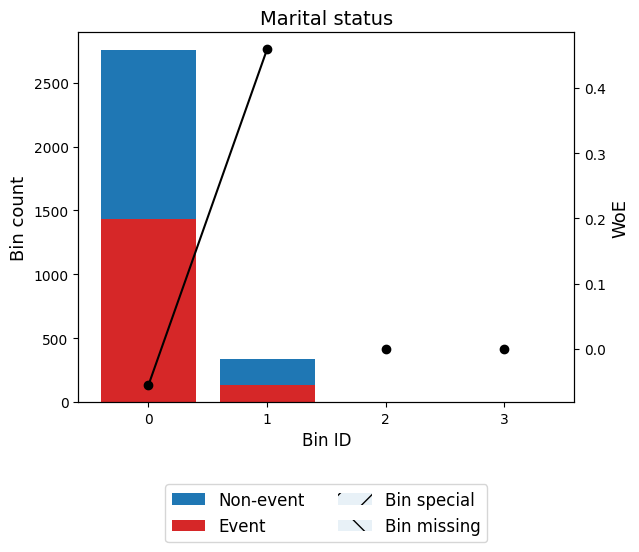

<Figure size 800x400 with 0 Axes>

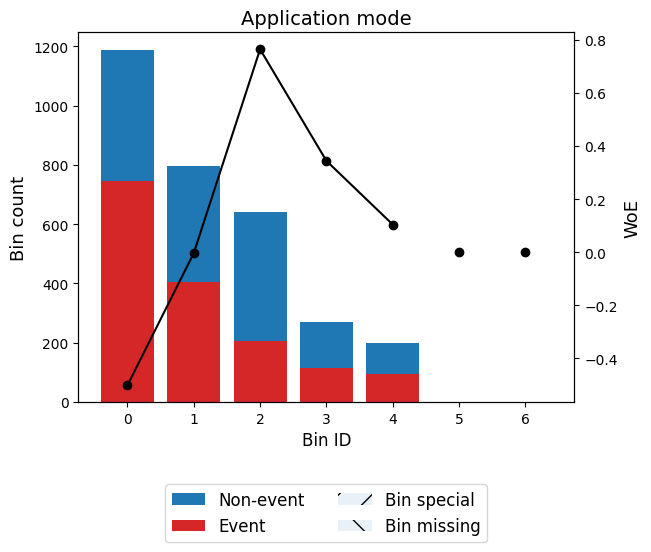

<Figure size 800x400 with 0 Axes>

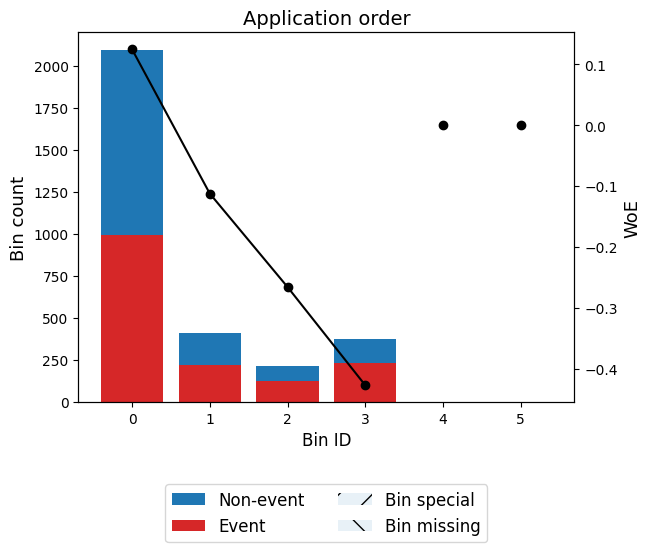

<Figure size 800x400 with 0 Axes>

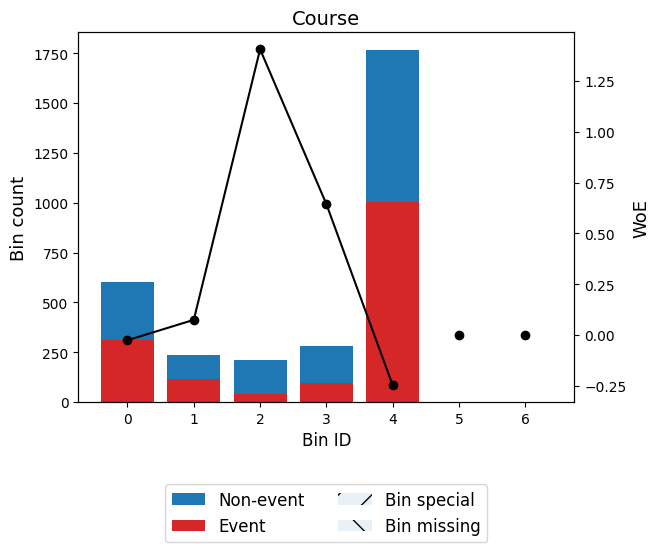

<Figure size 800x400 with 0 Axes>

C:\Users\sthaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


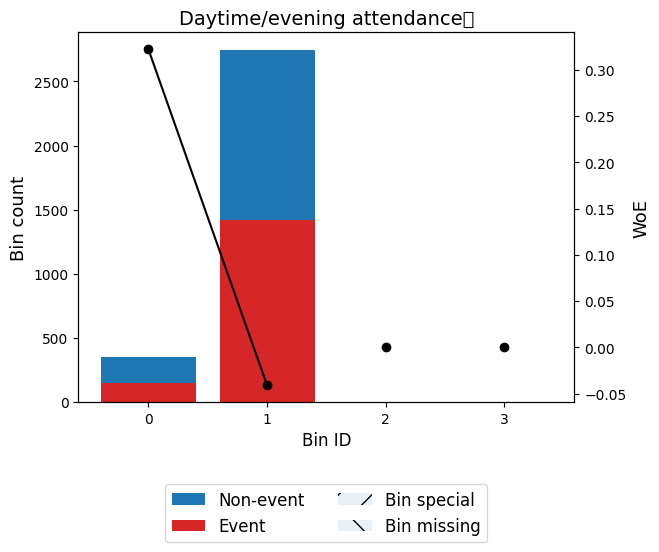

<Figure size 800x400 with 0 Axes>

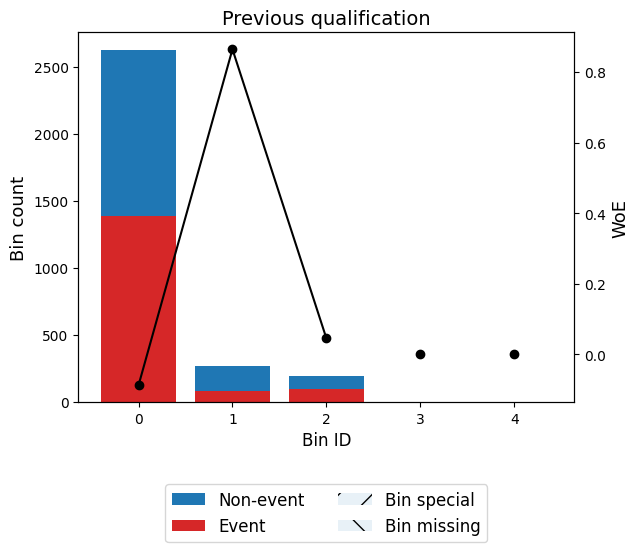

<Figure size 800x400 with 0 Axes>

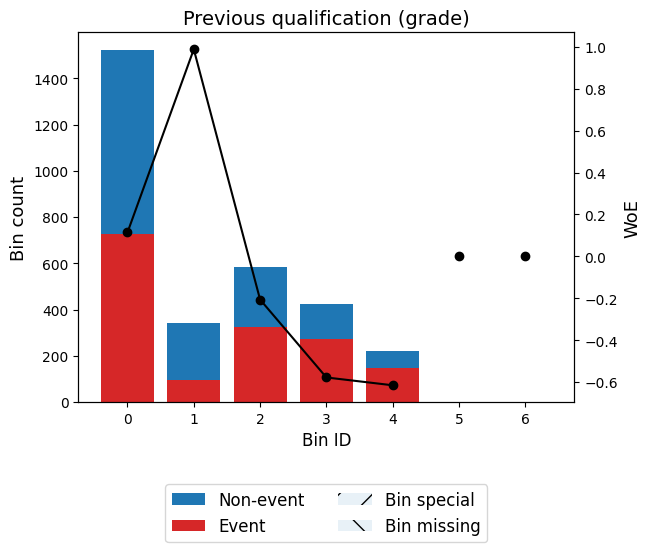

<Figure size 800x400 with 0 Axes>

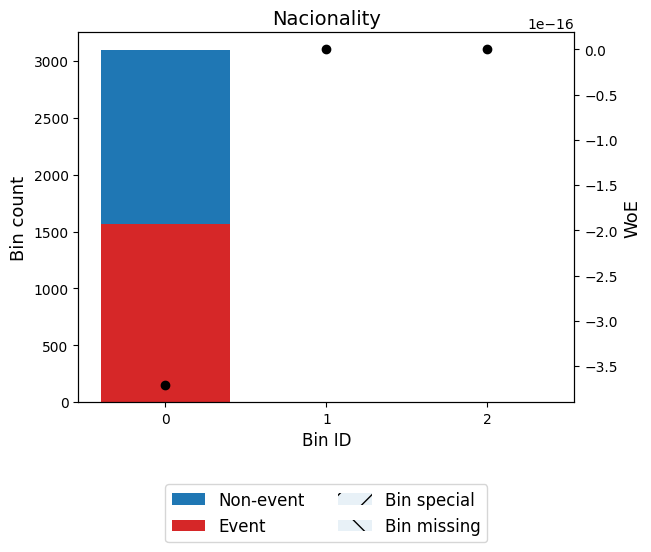

<Figure size 800x400 with 0 Axes>

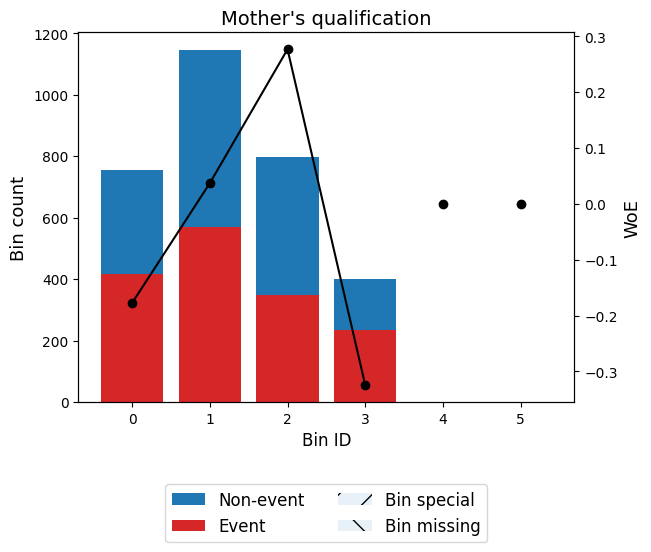

<Figure size 800x400 with 0 Axes>

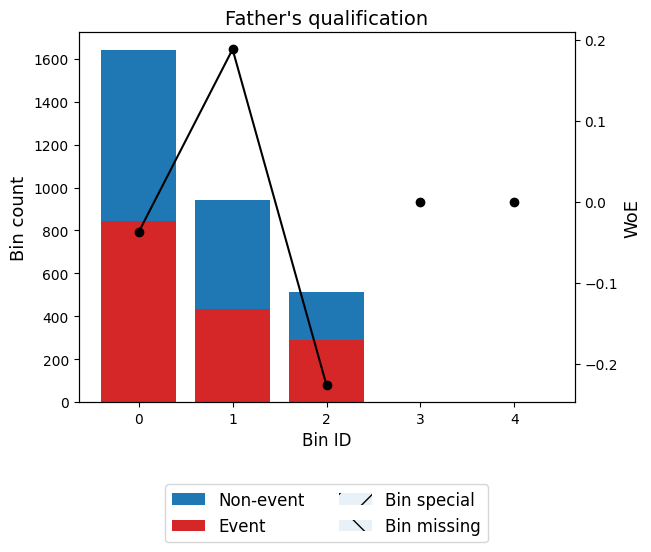

<Figure size 800x400 with 0 Axes>

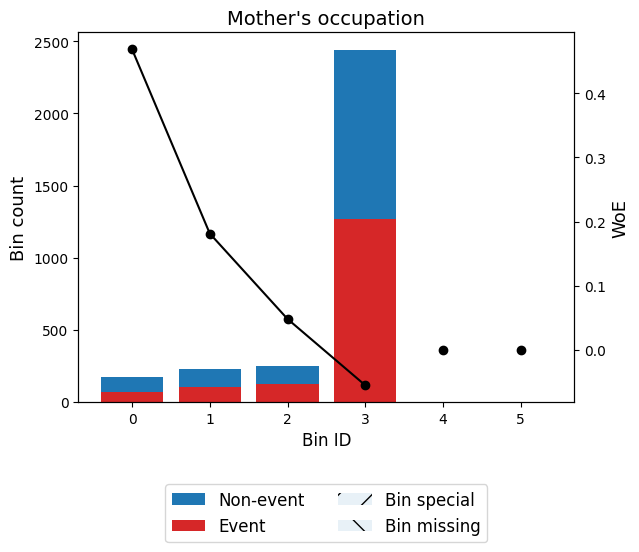

<Figure size 800x400 with 0 Axes>

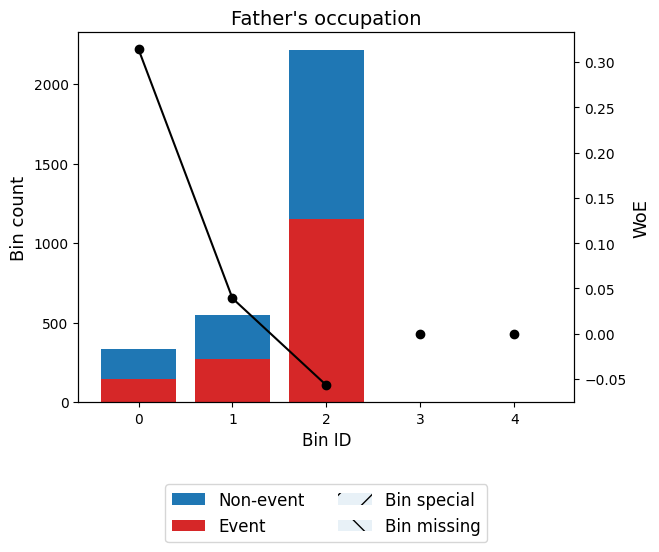

<Figure size 800x400 with 0 Axes>

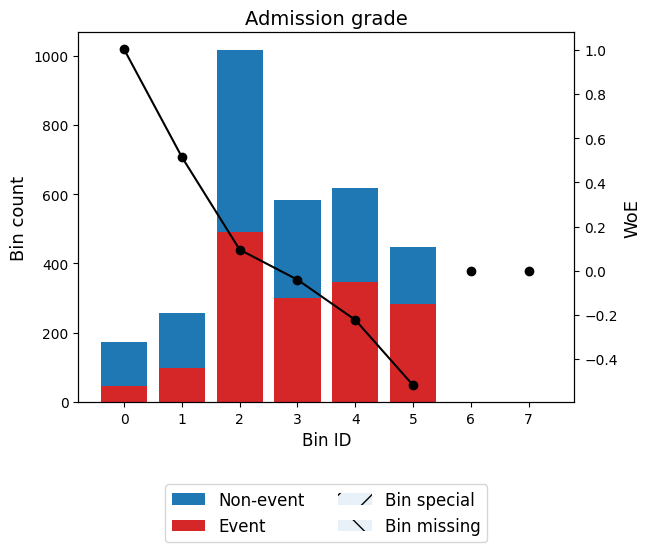

<Figure size 800x400 with 0 Axes>

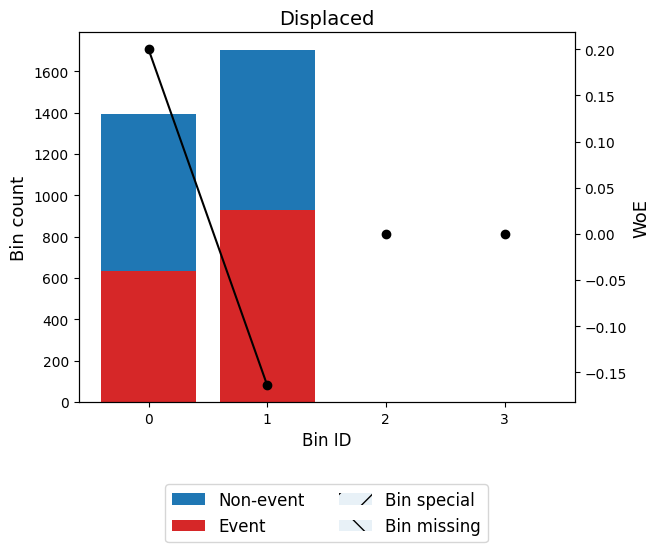

<Figure size 800x400 with 0 Axes>

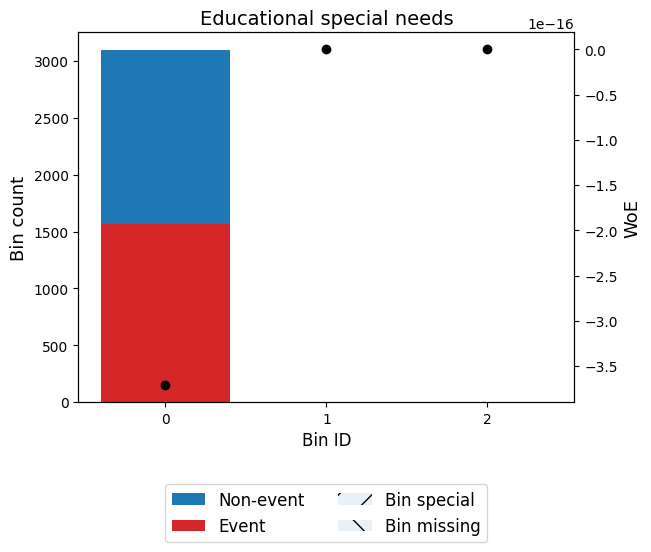

<Figure size 800x400 with 0 Axes>

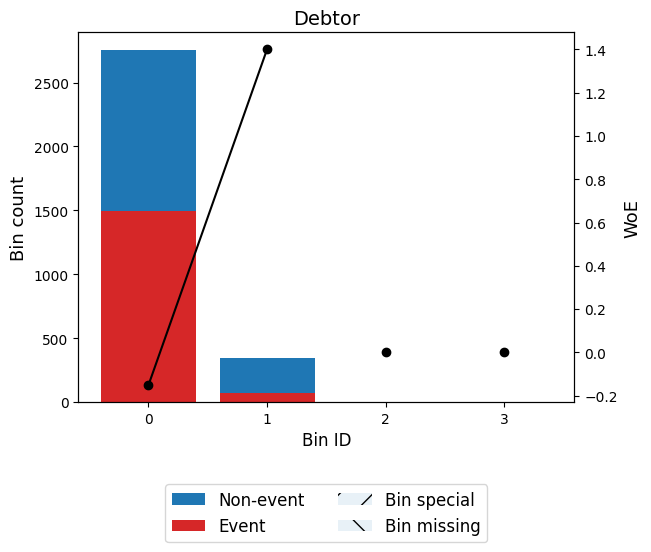

<Figure size 800x400 with 0 Axes>

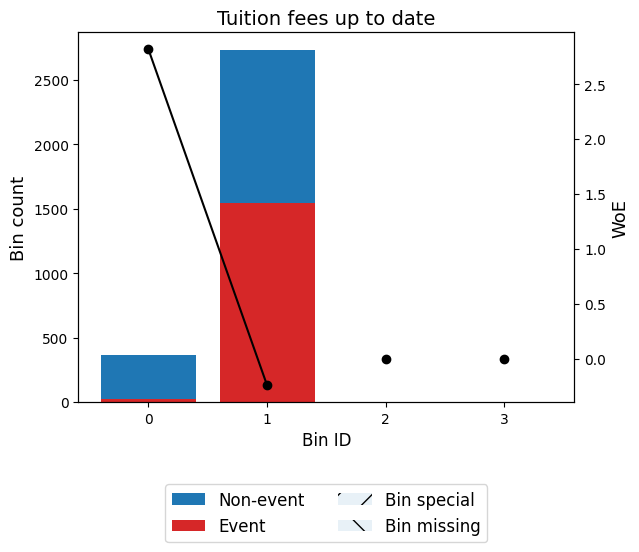

<Figure size 800x400 with 0 Axes>

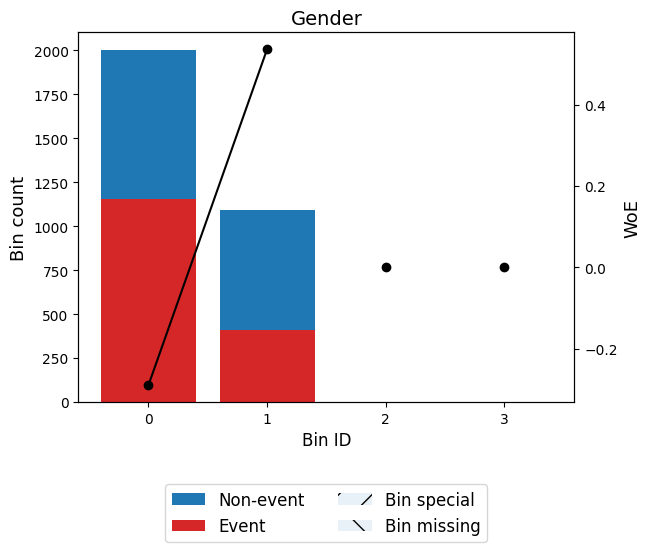

<Figure size 800x400 with 0 Axes>

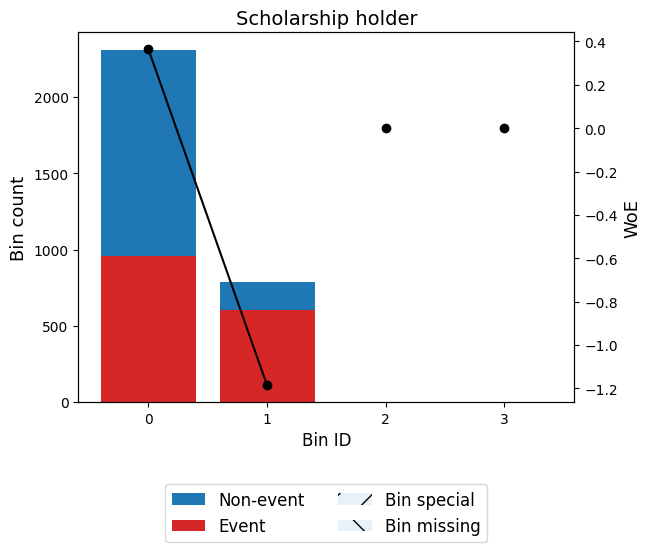

<Figure size 800x400 with 0 Axes>

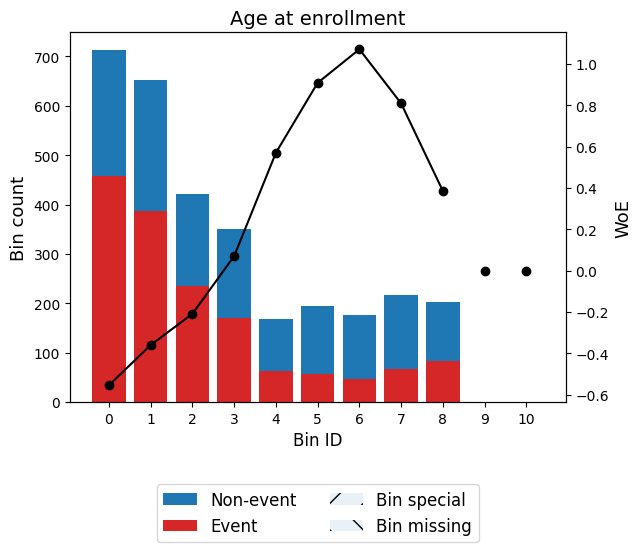

<Figure size 800x400 with 0 Axes>

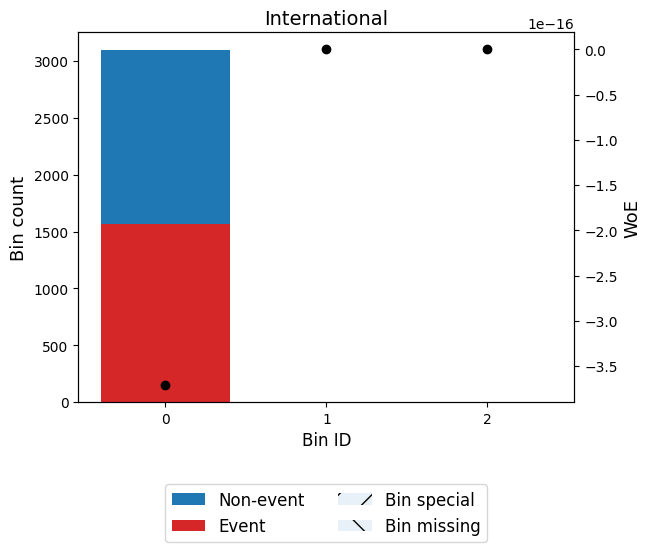

<Figure size 800x400 with 0 Axes>

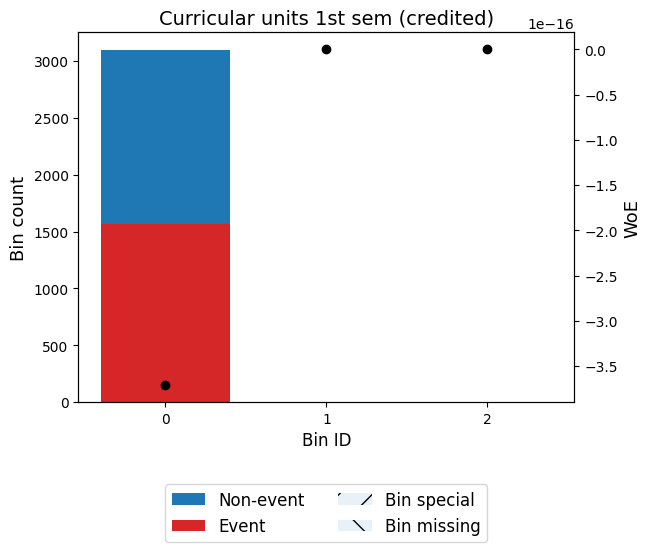

<Figure size 800x400 with 0 Axes>

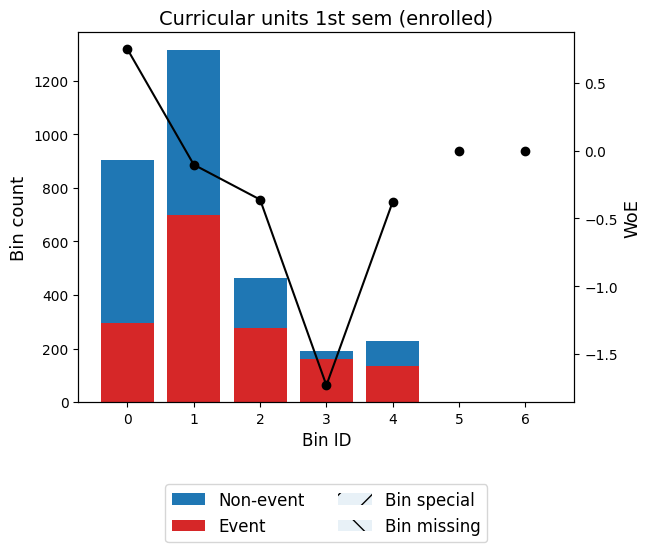

<Figure size 800x400 with 0 Axes>

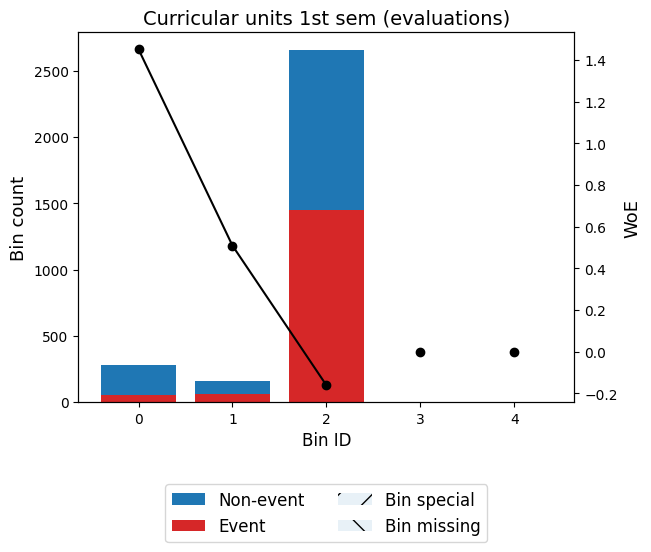

<Figure size 800x400 with 0 Axes>

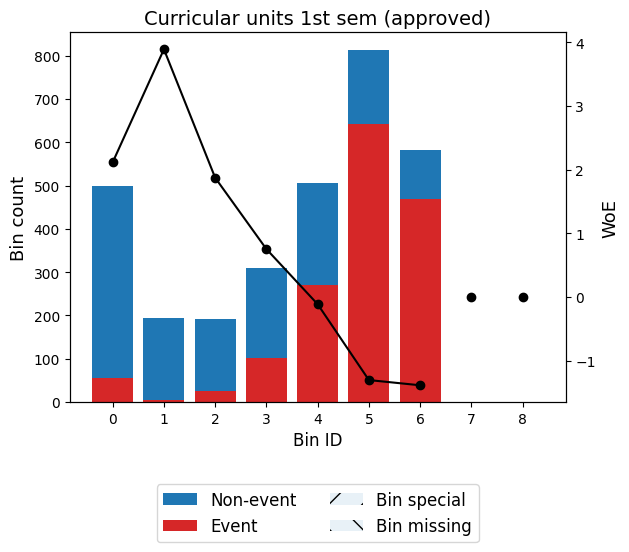

<Figure size 800x400 with 0 Axes>

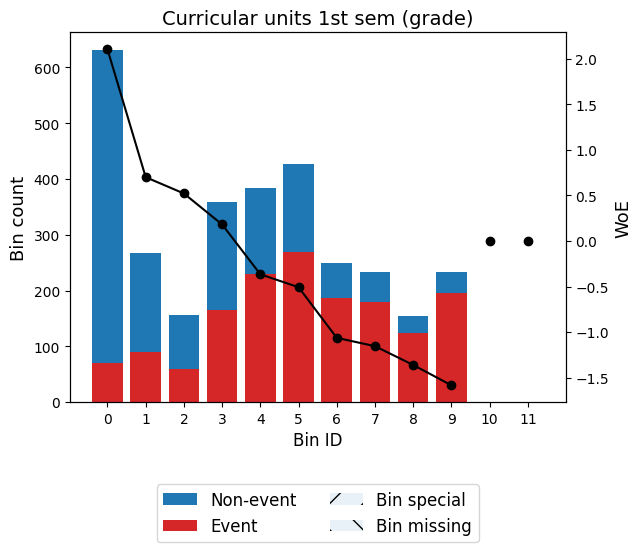

<Figure size 800x400 with 0 Axes>

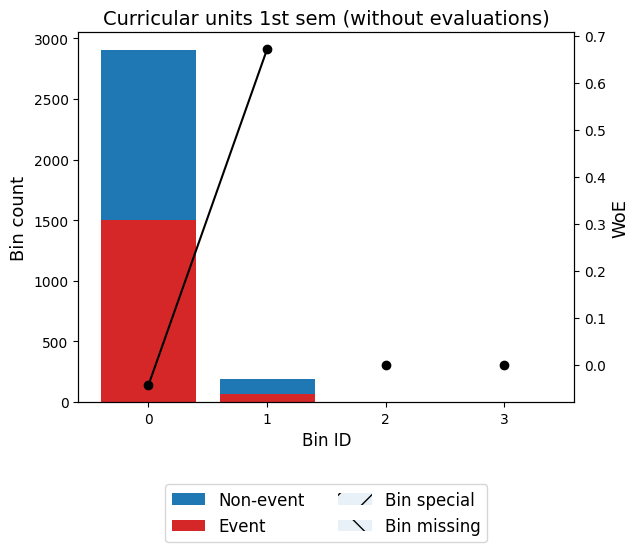

<Figure size 800x400 with 0 Axes>

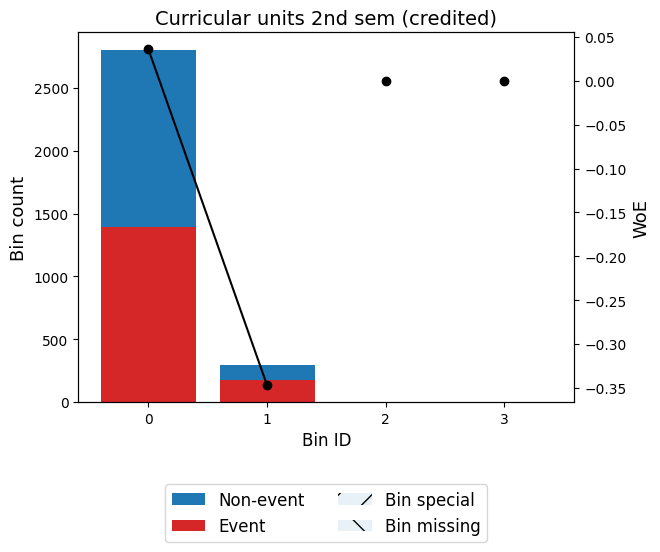

<Figure size 800x400 with 0 Axes>

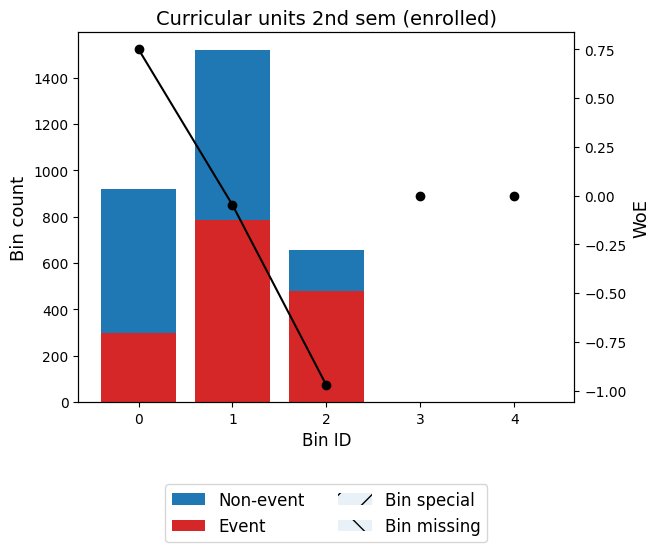

<Figure size 800x400 with 0 Axes>

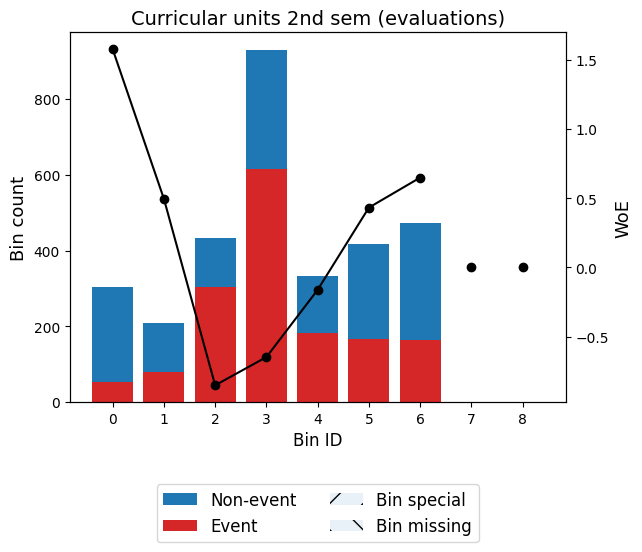

<Figure size 800x400 with 0 Axes>

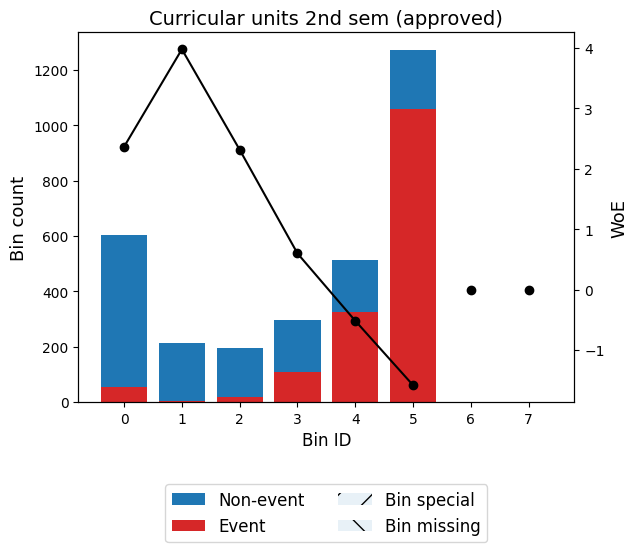

<Figure size 800x400 with 0 Axes>

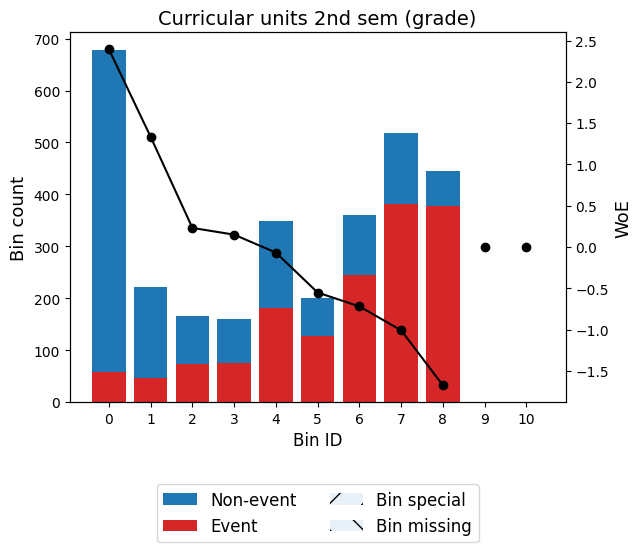

<Figure size 800x400 with 0 Axes>

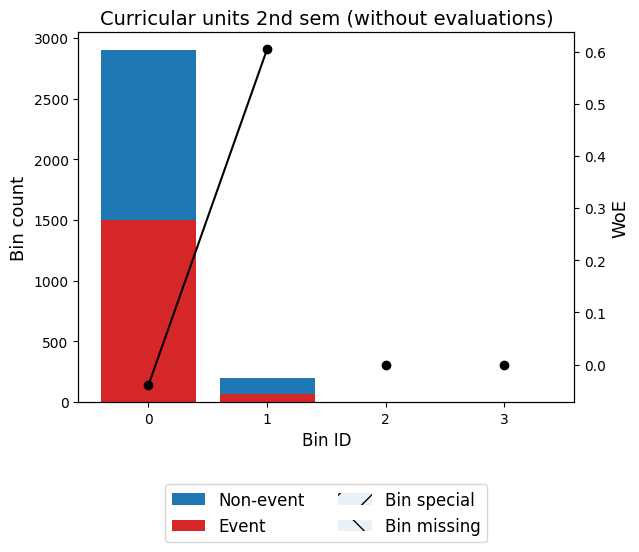

<Figure size 800x400 with 0 Axes>

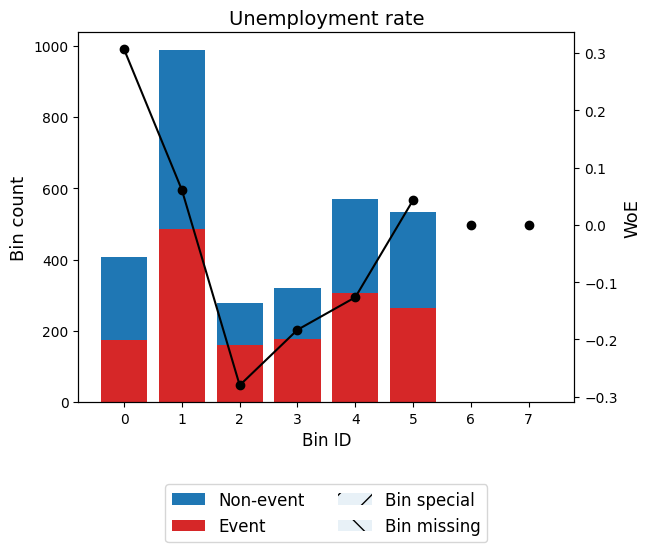

<Figure size 800x400 with 0 Axes>

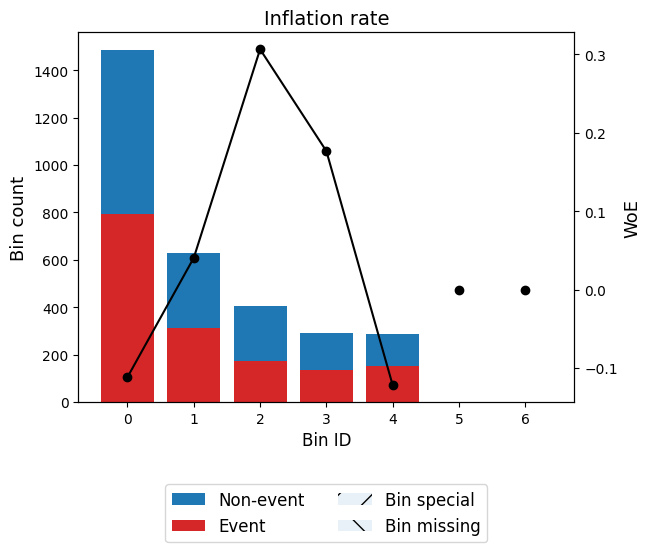

<Figure size 800x400 with 0 Axes>

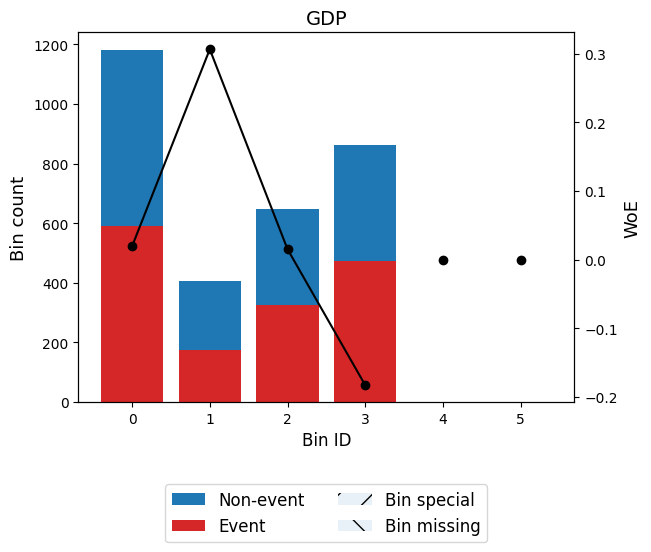

In [19]:
# Visualize WOE Binning
for feature, binning in optimal_bins.items():
    plt.figure(figsize=(8, 4))
    #plt.title(f"WOE Plot for {feature}")
    binning.binning_table.plot(metric="woe")
    plt.show()